In [1]:
#https://github.com/datablogger-ml/Time-Series-Forecasting/blob/master/Time%20Series%20Forecasting.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab 
from pylab import *
pylab.rcParams['figure.figsize'] = (16, 6) # size for all figures
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings

In [2]:
df = pd.read_csv(r'C:\Users\91783\Desktop\TSA\Bhiwadi1.csv',parse_dates=True,index_col='Date')
# parsing the date column as datetime type and setting as index

In [3]:
df.columns = ['PM2.5']

In [4]:

df.head()

,PM2.5
Date,
2021-01-01,228.53
2021-01-02,222.37
2021-01-03,128.14
2021-01-04,68.44
2021-01-05,62.51


In [5]:

df.head()

,PM2.5
Date,
2021-01-01,228.53
2021-01-02,222.37
2021-01-03,128.14
2021-01-04,68.44
2021-01-05,62.51


In [6]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [7]:
print(f'The Daily data consists of values from {df.index.min()} to {df.index.max()}')

The Daily data consists of values from 2021-01-01 00:00:00 to 2021-12-31 00:00:00


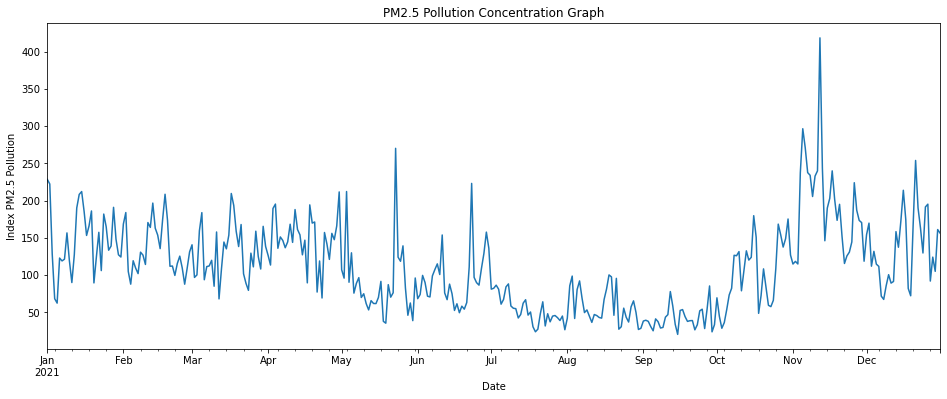

In [8]:
df['PM2.5'].plot(title='PM2.5 Pollution Concentration Graph').autoscale(axis='x',tight=True)
plt.ylabel('Index PM2.5 Pollution');

In [9]:
df['7 Days Mean'] = df['PM2.5'].rolling(window=7).mean() # Rolling mean with window size = 7

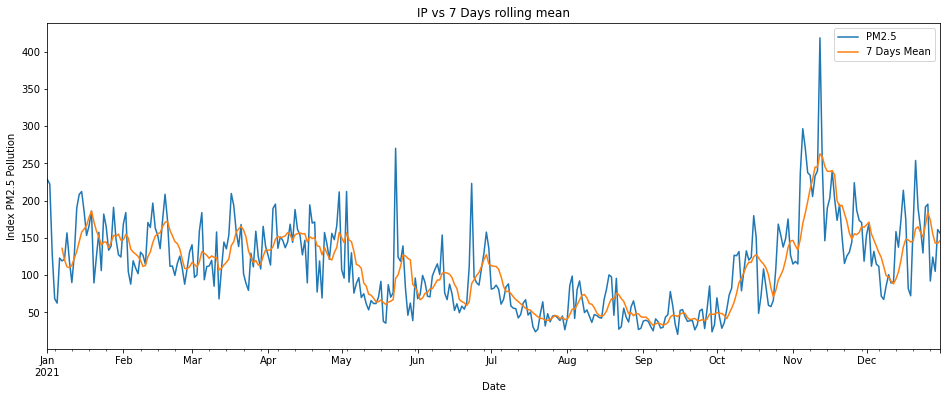

In [10]:
df[['PM2.5','7 Days Mean']].plot(title='IP vs 7 Days rolling mean')
plt.ylabel('Index PM2.5 Pollution');

In [11]:
from statsmodels.tsa.filters.hp_filter import hpfilter

wti_cycle,wti_trend = hpfilter(df['PM2.5'],lamb=14400) # lambda-> 100*(number of periods in a year)^2

df['Trend'] = wti_trend

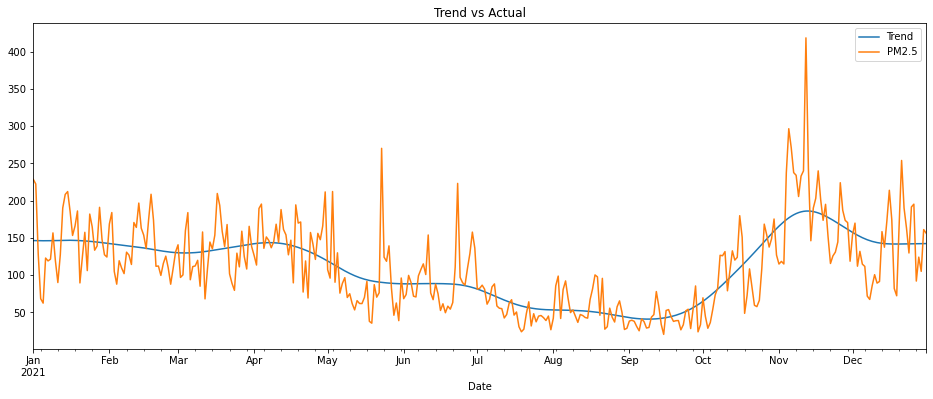

In [12]:
df[['Trend','PM2.5']].plot(title='Trend vs Actual',figsize=(16,6)).autoscale(axis='x',tight=True);

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
ets = seasonal_decompose(df['PM2.5'],model='add') # model-> type of seasonality 

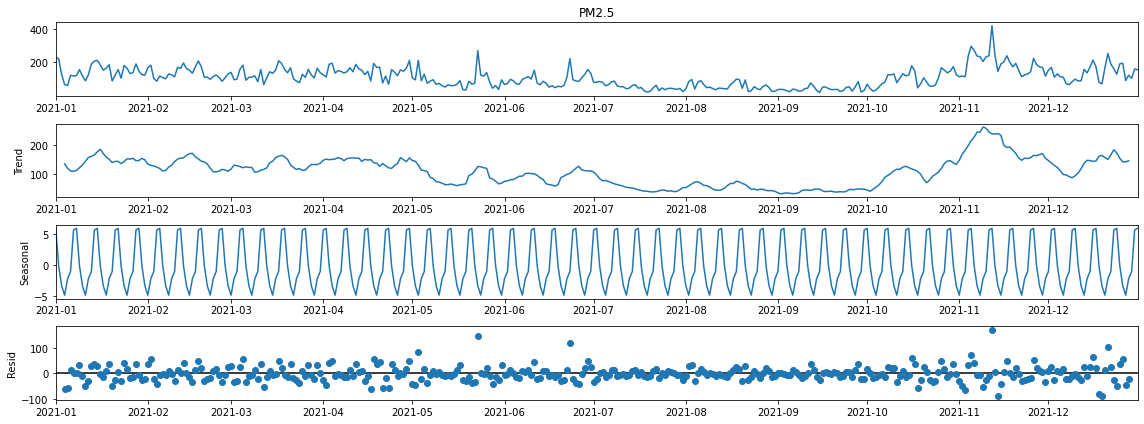

In [14]:
ets.plot();

In [15]:
from pmdarima import auto_arima
filterwarnings('ignore')

In [16]:
arima_model = auto_arima(df['PM2.5'],start_p=0,start_q=0,max_p=3,max_q=3,seasonal=False,trace=True,
                         error_action='ignore',suppress_warnings=True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3741.438, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3722.721, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3695.784, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3739.446, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3670.032, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3670.633, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3670.084, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3669.104, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3670.247, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3670.221, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3667.109, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3693.801, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3668.087, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3668.250, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1830.554
Date:                Thu, 10 Nov 2022   AIC                           3667.109
Time:                        15:17:11   BIC                           3678.800
Sample:                             0   HQIC                          3671.755
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4228      0.038    -11.264      0.000      -0.496      -0.349
ma.L2         -0.2955      0.041     -7.273      0.000      -0.375      -0.216
sigma2      1364.4055     57.524     23.719      0.000    1251.661    1477.150
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               330.23
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.91
Prob(H) (two-sided):                  0.28   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# Finding the split point index to keep 1 month (30 days) data as test set
n_test =30
train_data = df.iloc[:len(df) - n_test]
test_data = df.iloc[len(df) - n_test:]

In [18]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.arima.model import ARMA
import statsmodels.api as sm
model = ARIMA(train_data['PM2.5'],order=(1,1,0))
results = model.fit()
results.summary()

ImportError: cannot import name 'ARMA' from 'statsmodels.tsa.arima.model' (C:\Users\91783\anaconda3\lib\site-packages\statsmodels\tsa\arima\model.py)

In [25]:
model = sm.tsa.arima.ARIMA(train_data, order=(1,1,2))
result = model.fit()

ValueError: SARIMAX models require univariate `endog`. Got shape (335, 3).

In [166]:
# Obtain predicted values on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start=start,end=end,dynamic=False,typ='levels').rename('ARIMA Predictions')

In [167]:

# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted = {predictions[i]}, expected = {test_data['PM2.5'][i]}")

predicted = 144.75275236723013, expected = 169.87
predicted = 146.9275048425581, expected = 112.06
predicted = 146.05923775179429, expected = 132.0
predicted = 145.98161000479337, expected = 114.83
predicted = 145.69855782382845, expected = 111.79
predicted = 145.46887915431643, expected = 71.9
predicted = 145.22533294397763, expected = 67.5
predicted = 144.98538980721122, expected = 85.79
predicted = 144.74451051750103, expected = 100.69
predicted = 144.503874459664, expected = 89.37
predicted = 144.26317520516182, expected = 91.58
predicted = 144.0224923704587, expected = 158.47
predicted = 143.78180526955262, expected = 137.51
predicted = 143.5411192770942, expected = 172.9
predicted = 143.30043299663816, expected = 213.97
predicted = 143.05974679100987, expected = 174.45
predicted = 142.81906056593976, expected = 82.18
predicted = 142.57837434592105, expected = 72.37
predicted = 142.33768812458987, expected = 167.35
predicted = 142.0970019035997, expected = 253.97
predicted = 141.8

In [168]:
compare = pd.DataFrame(columns=['Actual','Predicted'])

compare['Actual'] = test_data['PM2.5']
compare['Predicted'] = predictions

compare.head()

,Actual,Predicted
Date,,
2021-12-02,169.87,144.752752
2021-12-03,112.06,146.927505
2021-12-04,132.00,146.059238
2021-12-05,114.83,145.981610
2021-12-06,111.79,145.698558


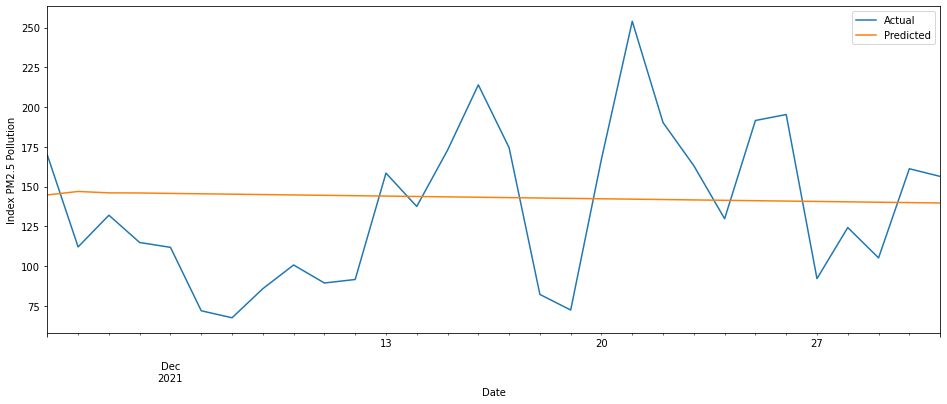

In [169]:
compare.plot(legend=True)
plt.ylabel('Index PM2.5 Pollution')
plt.show()

In [170]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f"SARIMA MAE : {mean_absolute_error(compare['Actual'],compare['Predicted'])}")
print(f"SARIMA MSE : {mean_squared_error(compare['Actual'],compare['Predicted'])}")

SARIMA MAE : 41.51389595339515
SARIMA MSE : 2291.205142012497


In [171]:
from pmdarima import auto_arima
filterwarnings('ignore')

In [172]:
sarima_model = auto_arima(df['PM2.5'],start_p=0,start_q=0,max_p=3,max_q=3,start_P=0,start_Q=0,max_P=3,max_Q=3,m=12,seasonal=True,trace=True,stepwise=True,
           error_action='ignore',suppress_warnings=True)
sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3741.438, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3723.881, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3695.706, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3739.446, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3695.784, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3694.524, Time=0.44 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=3695.084, Time=0.65 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   : AIC=3693.534, Time=0.96 sec
 ARIMA(0,1,1)(1,0,3)[12] intercept   : AIC=3695.501, Time=1.81 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=3741.025, Time=0.60 sec
 ARIMA(1,1,1)(0,0,3)[12] intercept   : AIC=3669.515, Time=1.35 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3671.313, Time=0.55 sec
 ARIMA(1,1,1)(1,0,3)[12] intercept   : AIC=3671.496, Time=2.18 sec
 ARIMA(1,1,1)(1,0,2)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(1, 1, 3)x(0, 0, 3, 12)   Log Likelihood               -1825.416
Date:                            Sat, 28 May 2022   AIC                           3666.832
Time:                                    12:09:14   BIC                           3698.009
Sample:                                         0   HQIC                          3679.224
                                            - 365                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9570      0.061    -15.683      0.000      -1.077      -0.837
ma.L1          0.5438      0.067      8.082      0.000       0.412       0.676
ma.L2         -0.6849      0.046    -14.922      0.000      -0.775      -0.595
ma.L3         -0.3165      0.045     -7.090      0.000      -0.404      -0.229
ma.S.L12      -0.1003      0.065     -1.542      0.123      -0.228       0.027
ma.S.L24      -0.0636      0.064     -0.994      0.320      -0.189       0.062
ma.S.L36      -0.1091      0.057     -1.910      0.056      -0.221       0.003
sigma2      1323.6582     65.488     20.212      0.000    1195.303    1452.013
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               279.91
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.84
Prob(H) (two-sided):                  0.27   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [173]:
# Finding the split point index to keep 1 months (3
0 days) data as test set
n_test = 30
train_data = df.iloc[:len(df) - n_test]
test_data = df.iloc[len(df) - n_test:]

In [174]:
#Fit a SARIMA (2,1,2)(1,0,1,12) Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data['PM2.5'],order=(2,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                PM2.5   No. Observations:                  335
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1671.343
Date:                              Sat, 28 May 2022   AIC                           3356.686
Time:                                      12:09:14   BIC                           3383.364
Sample:                                  01-01-2021   HQIC                          3367.323
                                       - 12-01-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0271      1.125      0.024      0.981      -2.178       2.232
ar.L2          0.1139      0.499      0.228      0.819      -0.864       1.092
ma.L1         -0.4582      1.123     -0.408      0.683      -2.660       1.744
ma.L2         -0.3335      0.969     -0.344      0.731      -2.232       1.565
ar.S.L12       0.8744      0.113      7.728      0.000       0.653       1.096
ma.S.L12      -0.9598      0.121     -7.902      0.000      -1.198      -0.722
sigma2      1283.3985     89.453     14.347      0.000    1108.075    1458.722
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               317.49
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.94
Prob(H) (two-sided):                  0.86   Kurtosis:                         7.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [175]:
# Obtain predicted values on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start=start,end=end,dynamic=False,typ='levels').rename('SARIMA Predictions')

In [176]:

# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted = {predictions[i]}, expected = {test_data['PM2.5'][i]}")

predicted = 155.26027392944977, expected = 169.87
predicted = 159.01677292994754, expected = 112.06
predicted = 160.74954282914427, expected = 132.0
predicted = 162.0710464876052, expected = 114.83
predicted = 154.2571234268921, expected = 111.79
predicted = 164.76815890626662, expected = 71.9
predicted = 164.47034183735616, expected = 67.5
predicted = 170.583502937952, expected = 85.79
predicted = 168.33292131011444, expected = 100.69
predicted = 157.82232777781675, expected = 89.37
predicted = 156.51751260781333, expected = 91.58
predicted = 154.84487751017608, expected = 158.47
predicted = 151.72748134699572, expected = 137.51
predicted = 155.88630120467025, expected = 172.9
predicted = 156.97327228247175, expected = 213.97
predicted = 158.21682790538907, expected = 174.45
predicted = 151.33773684414015, expected = 82.18
predicted = 160.5376120827586, expected = 72.37
predicted = 160.27214343574727, expected = 167.35
predicted = 165.6185024231459, expected = 253.97
predicted = 163.6

In [177]:
compare = pd.DataFrame(columns=['Actual','Predicted'])

compare['Actual'] = test_data['PM2.5']
compare['Predicted'] = predictions

compare.head()

,Actual,Predicted
Date,,
2021-12-02,169.87,155.260274
2021-12-03,112.06,159.016773
2021-12-04,132.00,160.749543
2021-12-05,114.83,162.071046
2021-12-06,111.79,154.257123


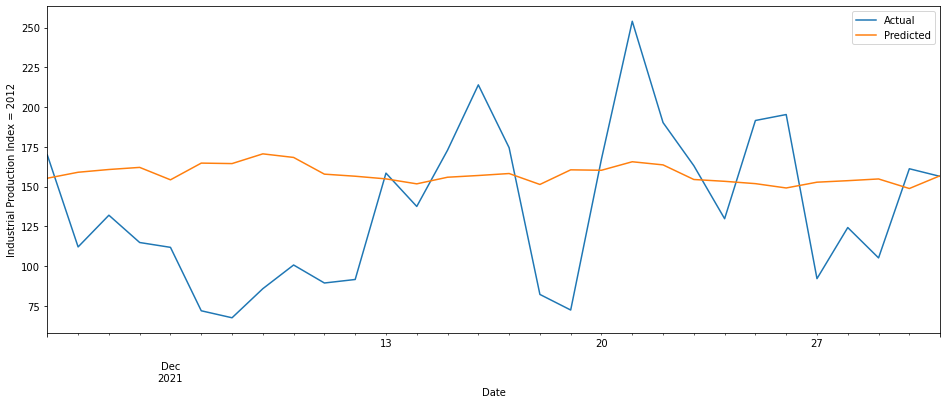

In [178]:
compare.plot(legend=True)
plt.ylabel('Industrial Production Index = 2012')
plt.show()

In [179]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f"SARIMA MAE : {mean_absolute_error(compare['Actual'],compare['Predicted'])}")
print(f"SARIMA MSE : {mean_squared_error(compare['Actual'],compare['Predicted'])}")

SARIMA MAE : 43.79518024656686
SARIMA MSE : 2753.9710326486975


In [180]:
#Retrain on the full dataset, and forecast the future

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['PM2.5'],order=(2,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(start=len(df),end=len(df)+23,typ='levels').rename('SARIMA Forecast')

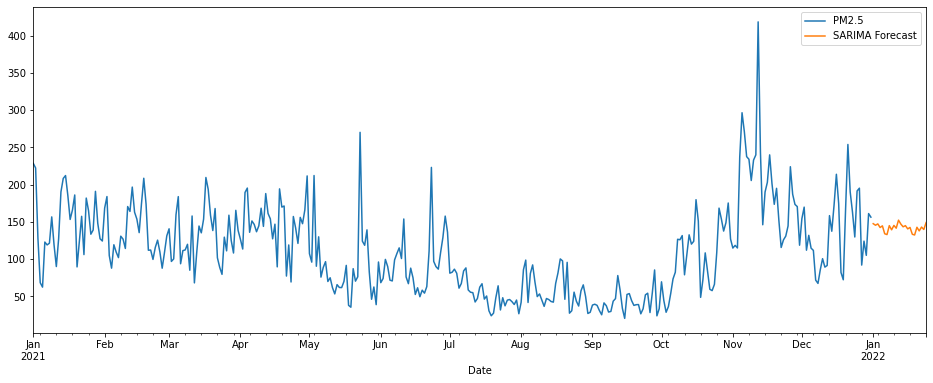

In [163]:
# Plotting the Forecast
df['PM2.5'].plot(legend=True).autoscale(axis='x',tight=True)
fcast.plot(legend=True)
plt.show()